# CREDIT CARD FRAUD DETECTION

-Building a model to detect fraudulent credit card transaction using algorithm like logistic regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
card = pd.read_csv(r"C:\Users\MAGOMA\Documents\CODSOFT\machine_learning\credit_card\creditcard.csv")

In [8]:
# Displaying the first five rows
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Cleaning

In [10]:
# Checking for the information about the data
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

From the above information, we can see that we do not have any missing value and the data types are correct

In [17]:
# Checking for duplicate rows across all columns
drows = card[card.duplicated()]
drows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [22]:
# Removing the duplicated rows
card.drop_duplicates(card.iloc[:, :], inplace=True)

In [23]:
# Confirming if we removed the duplicated rows

d = card[card.duplicated()]
d

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


Now we managed to remove all duplicated rows

In [25]:
# Checking for the unique values under column Class
card['Class'].unique()

array([0, 1], dtype=int64)

##### For column Class:
0 means legitimate and
1 means fraudulent

<Axes: xlabel='Class', ylabel='count'>

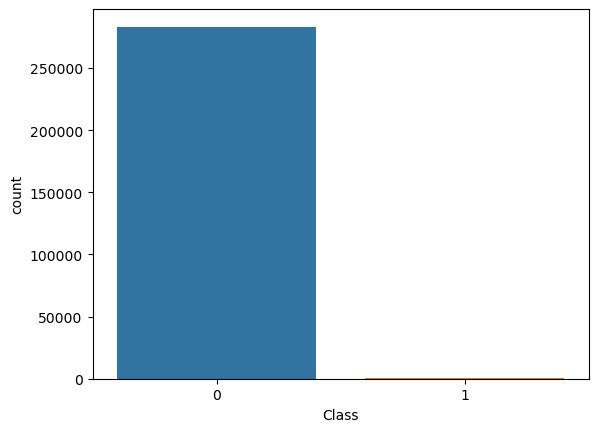

In [26]:
# Count plot for both legitimate and fraudulent transactions

sns.countplot(x='Class', data=card)

In [30]:
# Counting the number of fraudulent transactions
card[card['Class']==1].count()

Time      473
V1        473
V2        473
V3        473
V4        473
V5        473
V6        473
V7        473
V8        473
V9        473
V10       473
V11       473
V12       473
V13       473
V14       473
V15       473
V16       473
V17       473
V18       473
V19       473
V20       473
V21       473
V22       473
V23       473
V24       473
V25       473
V26       473
V27       473
V28       473
Amount    473
Class     473
dtype: int64

# MODELING

In [46]:
x = card.drop(columns = ['Time', 'Class'])
y = card['Class']

In [32]:
from sklearn.model_selection import train_test_split

In [47]:
# Splitting data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [48]:
# Checking for the shapes of train data and test data
print('x_train :', x_train.shape)
print('x_test', x_test.shape)

x_train : (198608, 29)
x_test (85118, 29)


In [36]:
# Importing the logistic regression 
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\MAGOMA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# Making predictions from test data
pred = lr.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import r2_score

In [55]:
# Checking how good our mmodel can be
r2_score(y_test, pred)

0.45301074178798084

In [56]:
from sklearn.tree import DecisionTreeClassifier


In [75]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
dpred = dtc.predict(x_test)
dpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
r2_score(y_test, dpred)

0.32974555683879336

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
print(confusion_matrix(y_test, dpred))

[[84941    47]
 [   40    90]]


In [63]:
from sklearn.metrics import classification_report


In [64]:
print(classification_report(y_test, dpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84988
           1       0.66      0.69      0.67       130

    accuracy                           1.00     85118
   macro avg       0.83      0.85      0.84     85118
weighted avg       1.00      1.00      1.00     85118



In [65]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [69]:
r = rfc.predict(x_test)

In [70]:
r

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
r2_score(y_test, r)

0.676428889508383

In [72]:
print(classification_report(y_test, r))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84988
           1       0.94      0.72      0.82       130

    accuracy                           1.00     85118
   macro avg       0.97      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118

